In [4]:
import numpy as np
import matplotlib.pyplot as plt

0 1e-100 0.0 4.0
1 0.0001 0.0 4.0


//anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


yes


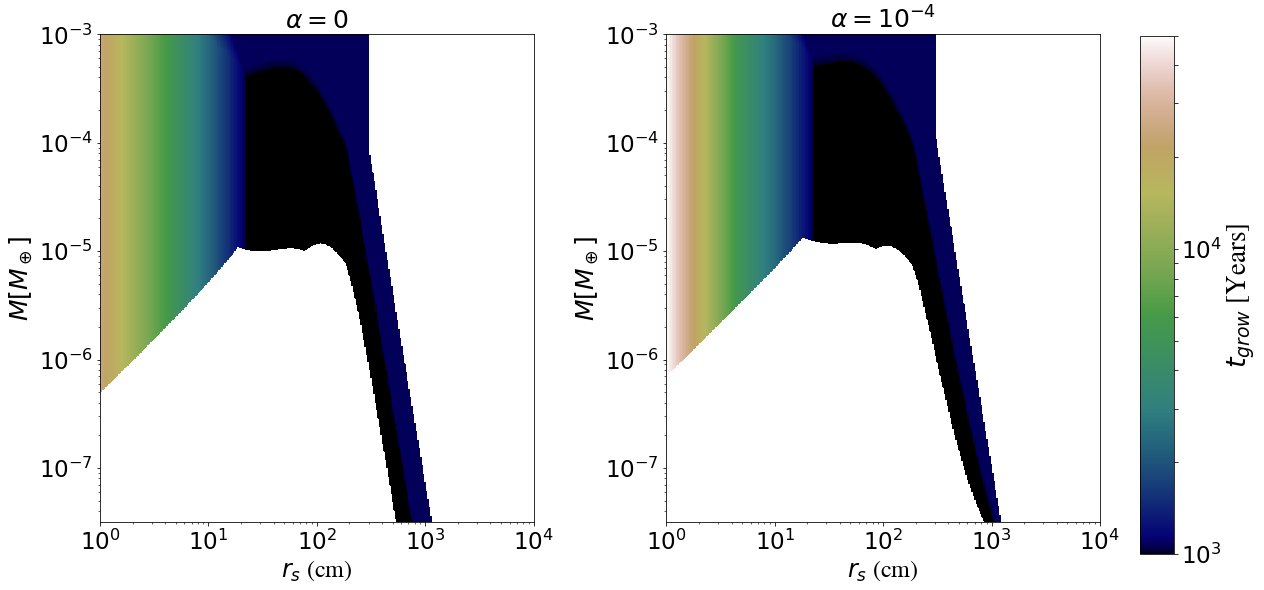

In [27]:
from matplotlib.colors import LogNorm
import os

#Flags
save_fig = 1

plt.rcParams['figure.figsize'] = (6,5)
plt.rcParams['legend.frameon'] = True
plt.rcParams['font.family'] = 'stixgeneral'
plt.rcParams['font.size'] = 18
file_names = ['rev_a_3.0_M___1.0_alph_0.00000_long_grid_2','rev_a_3.0_M___1.0_alph_0.00010_long_grid_2']

fig = plt.figure(1,figsize=(16,9))


# props = dict(boxstyle='round,pad=1', facecolor='wheat', alpha=0.6)

for j,fname in enumerate(file_names):

    fname_param = fname + '_params.txt'
    f = open('Data/' + fname_param,'r')
    param_arr = f.readlines()
    param_arr = [float(i) for i in param_arr]
    f.close()
    m_range_low,m_range_hi,r_range_low,r_range_hi,m_star,semi_major,alph = param_arr

    m_arr = np.logspace(m_range_low,m_range_hi,num=1000)
    r_arr = np.logspace(r_range_low,r_range_hi,num=300)

    if os.path.exists('Data/' + fname + '.txt'):
        time_arr = np.loadtxt('Data/' + fname + '.txt')
    else:
        time_arr = np.loadtxt('Data/' + fname)
        print("Does Not Exist")

    ax = plt.subplot(1,2,j+1)
    plt.rc('lines', linewidth=3)
    print(j,alph, r_range_low, r_range_hi)
    ax = plt.gca()

    if j == 0:
        plt.title(r'$\alpha = 0$',fontsize=25)
    else:
        plt.title(r'$\alpha = 10^{%.3g}$' %np.log10(alph),fontsize=25)

    X, Y = np.meshgrid(r_arr,m_arr)
    im = plt.pcolormesh(X,Y,time_arr, cmap='gist_earth',norm=LogNorm(),vmin=1e3,vmax=5e4)

    plt.xscale('log')
    plt.yscale('log')
    # plt.ylim(1e-2, max(lum_array))
    # cbar = plt.colorbar(im)
    plt.xlabel(r'$r_{s}$ (cm)',fontsize=24)
    plt.ylabel(r'$M \left[ M_\oplus \right]$',fontsize=25)
    # cbar.set_label(r'$t_{grow}$ (years)')
    # plt.title('Timescale - ' + param_str)
    im.set_edgecolor('face')
    ax = plt.gca()
    ax.tick_params(labelsize=23)
    # ax.set_axis_bgcolor('#D3D3D3')

    # ax.autoscale = False
    im_2 = plt.imread("Data/red_lines_3.png")
    # implot = plt.imshow(im_2)
    # implot = plt.imshow(im_2,extent=[10**(-10),10**10,10**(-10),10**10],aspect=1.5)
    implot = plt.imshow(im_2,extent=[10**r_range_low/1e2,10**r_range_hi*1e2,10**m_range_low/1e2,10**m_range_hi*1e2])
    plt.axis(np.power(10,[r_range_low,r_range_hi,m_range_low,m_range_hi]))


param_str = r'rev_$a = %.1f$ AU, $M_* = %.1fM_{\odot}$_2'% (semi_major,m_star)
# plt.suptitle('Timescale - ' + param_str,fontsize=20,y=0.87)

cax = fig.add_axes([1.0, 0.1, 0.03, 0.8])
cb = fig.colorbar(im, cax=cax,cmap='gist_earth',norm=LogNorm())
cb.set_label(label=r'$t_{grow}$ [Years]',fontsize=27)
cb.ax.tick_params(labelsize=23)


#fig.set_tight_layout(True)

plt.tight_layout()

if save_fig:
    fig.savefig('test.png', bbox_inches="tight", dpi=300)
    print('yes')
plt.show()